# -*- coding: utf-8 -*-
NN_04_23_2024.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1hqRPRc5jw_YP3mABA8Y5R_F7r0MRvMcT?usp=sharing

# Import Libraries




In [14]:

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam


"""
# Load Data
"""

In [15]:

file_path = '/content/drive/MyDrive/AI-LINX/csv/comms_decisionFactor.csv'
data = pd.read_csv(file_path)

# Assume the following columns based on your previous mentions
features = data[['duration', 'power', 'voltage', 'priority_t', 'priority_e']]
target = data['execute']


# Split Data
Split the data into training and test sets:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Define the Neural Network


In [17]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Model Summary
Print and save model architecture:

In [18]:
def print_model_summary(model):
    model.summary()
    print("\nModel architecture is now printed above. Training will start next...\n")

def save_model_diagram(model, filename='model_architecture.png'):
    tf.keras.utils.plot_model(model, to_file=filename, show_shapes=True, show_layer_names=True)
    print(f"Model architecture diagram is saved as {filename}.")

print_model_summary(model)
save_model_diagram(model)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Model architecture is now printed above. Training will start next...

Model architecture diagram is saved as model_architecture.png.


# Define Reward Function
Define the reward function with placeholder parameters

In [19]:
def xi_j(S_j, P_j, t_j_E, t_j_R, sigma, P_j_D, d_j, g_k):
    return S_j * P_j * np.exp(((t_j_E - t_j_R) / sigma) ** 2) + (P_j_D * d_j * g_k)

# Train the Model with Custom Training Loop


In [20]:
# Train the Model with Custom Training Loop
# Enhanced training function with elegant print statements
def train_model(model, X_train, y_train, epochs, batch_size):
    optimizer = Adam(learning_rate=0.001)
    print("Starting training...\n")
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train_shuffled = X_train.iloc[indices]
        y_train_shuffled = y_train.iloc[indices]

        # Batch training
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train_shuffled[i:i + batch_size].to_numpy()  # Convert DataFrame to NumPy array
            y_batch = y_train_shuffled[i:i + batch_size].to_numpy()  # Convert Series to NumPy array
            y_batch = y_batch.reshape(-1, 1)  # Reshape labels to match output shape of the model

            with tf.GradientTape() as tape:
                # Make predictions
                predictions = model(X_batch, training=True)
                # Compute losses
                loss = tf.keras.losses.binary_crossentropy(y_batch, predictions)
                # Apply reward function adjustments
                rewards = np.array([xi_j(x[1], x[2], 0, 0, 1, 0, 0, 0) for x in X_batch])  # Example placeholder
                loss *= rewards  # Modifying loss based on rewards

            # Compute gradients and update model weights
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Evaluate the model's performance periodically
        val_loss, val_accuracy = model.evaluate(X_test.to_numpy(), y_test.to_numpy().reshape(-1, 1))
        print(f"Epoch {epoch + 1}/{epochs}: Val Loss = {val_loss:.4f}, Val Accuracy = {val_accuracy:.4f}")

train_model(model, X_train, y_train, epochs=10, batch_size=32)

Starting training...

5/5 [==============================] - 0s 6ms/step - loss: 0.1922 - accuracy: 0.9865
Epoch 1/10: Val Loss = 0.1922, Val Accuracy = 0.9865
5/5 [==============================] - 0s 4ms/step - loss: 0.1957 - accuracy: 0.9865
Epoch 2/10: Val Loss = 0.1957, Val Accuracy = 0.9865
5/5 [==============================] - 0s 5ms/step - loss: 0.1825 - accuracy: 0.9865
Epoch 3/10: Val Loss = 0.1825, Val Accuracy = 0.9865
5/5 [==============================] - 0s 4ms/step - loss: 0.1632 - accuracy: 0.9865
Epoch 4/10: Val Loss = 0.1632, Val Accuracy = 0.9865
5/5 [==============================] - 0s 4ms/step - loss: 0.1415 - accuracy: 0.9865
Epoch 5/10: Val Loss = 0.1415, Val Accuracy = 0.9865
5/5 [==============================] - 0s 5ms/step - loss: 0.1243 - accuracy: 0.9865
Epoch 6/10: Val Loss = 0.1243, Val Accuracy = 0.9865
5/5 [==============================] - 0s 6ms/step - loss: 0.1057 - accuracy: 0.9865
Epoch 7/10: Val Loss = 0.1057, Val Accuracy = 0.9865
5/5 [=======

# Generate Predictions


In [21]:
predictions = model.predict(X_test.to_numpy())
print("Sample Predictions:")
for i in range(5):
    print(f"Input: {X_test.iloc[i].tolist()}, Predicted Execution Probability: {predictions[i][0]:.4f}")

5/5 [==============================] - 0s 3ms/step
Sample Predictions:
Input: [223.0, 9.44321461668181, 4.870556359529552, 0.3520907939861823, 0.5018593263022291], Predicted Execution Probability: 0.0012
Input: [83.0, 13.021993761984724, 4.576855012794814, 0.1256406489222852, 0.4415602299962871], Predicted Execution Probability: 0.0157
Input: [261.0, 19.68690922897614, 4.631903492119981, 0.1280743116731, 0.889704623953567], Predicted Execution Probability: 0.0002
Input: [106.0, 10.404907241627898, 4.332158162693097, 0.1291425951707591, 0.6760253828293433], Predicted Execution Probability: 0.0151
Input: [117.0, 5.509352711442396, 4.735748938671801, 0.2457406169389699, 0.8555246332206097], Predicted Execution Probability: 0.0237


# Visualize Reward Function Behavior


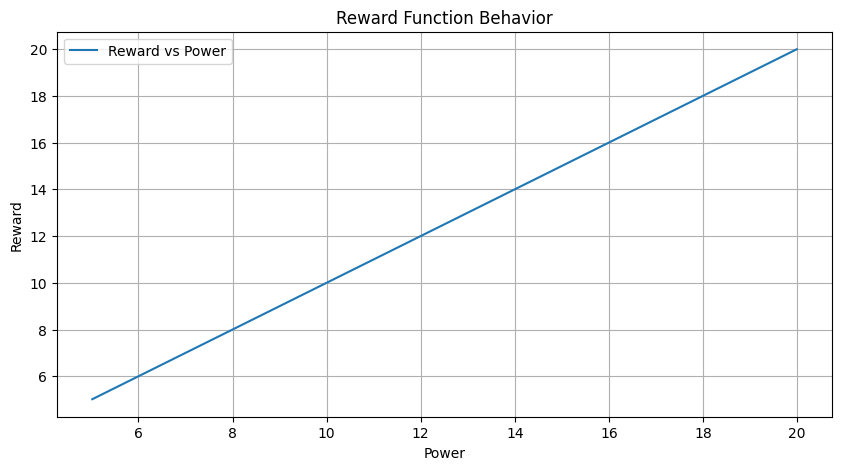

In [22]:
power_values = np.linspace(min(data['power']), max(data['power']), 100)
duration_values = np.linspace(min(data['duration']), max(data['duration']), 100)
reward_values = [xi_j(1, p, 0, 0, 1, 0, d, 0) for p, d in zip(power_values, duration_values)]

plt.figure(figsize=(10, 5))
plt.plot(power_values, reward_values, label='Reward vs Power')
plt.xlabel('Power')
plt.ylabel('Reward')
plt.title('Reward Function Behavior')
plt.legend()
plt.grid(True)
plt.show()


# Display Model Architecture Image

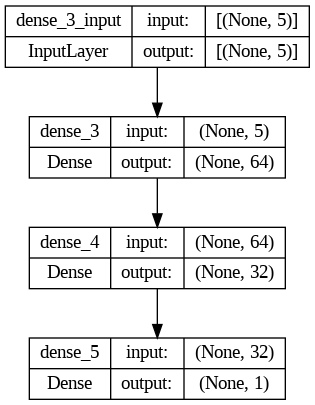

In [23]:

image_path = '/content/model_architecture.png'
display(Image(filename=image_path))